# Shopify Summer 2022 Data Science Intern Challenge

## Question 1
## a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
The “order amount” provided in the data set is the total order value regardless of the number of items in the order. Orders with multiple items will have a higher “order amount” and increase the average value. Calculating the cost per item and finding the average will produce a value that better represents the average cost of a pair of sneakers purchased in the 30 day window. 

In addition, shop #78 has a cost per item of 25,725. This may be a “bulk” item where hundreds of pairs of sneakers are sold as a single item. All other shops appear to sell individual pairs of sneakers as a single item. The high cost per item of shop #78 can be counteracted by either removing these orders when calculating the average or by calculating the median of the cost per item. 

(see below for code)


In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# A function to produce a figure with two box plots for a given data set
def box_plots(data, title): 
    fig1, (ax1, ax2) = plt.subplots(2, 1)
    ax1.boxplot(data, vert=False)
    ax2.boxplot(data, vert=False, showfliers=False)
    ax1.set_title(title)
    ax2.set_title(title + ' (Outliers Excluded)')
    fig1.tight_layout(pad=2.0)
    return ax1, ax2

# A function to display max, min and central tendency for a given set of data
def central_tendency(title, data):
    print(f"{title}:\n\
          Max = {data.max()}\n\
          Min = {data.min()}\n\
          Ave = {data.mean()}\n\
          Median = {data.median()}\n\
          Mode = {data.mode()}\n"
            )

orders = pd.read_csv(Data_Science_Intern_Challenge_Data_Set)

**Next, perform initial investigation of data**

In [4]:
# initial look at data
print(f'Sample of data:\n{orders.head()}\n\n')
print(f'Number of unique shops: {len(pd.unique(orders.shop_id))}\n\n')
print(f'Overview of data:\n{orders.describe(include="all")}\n')

Sample of data:
   order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11  


Number of unique shops: 100


Overview of data:
           order_id      shop_id      user_id   order_amount  total_items  \
count   5000.000000  5000.000000  5000.000000    5000.000000   5000.00000   
unique          NaN          NaN          NaN            NaN          NaN   
top             NaN          NaN          NaN            NaN          NaN   
freq            NaN      

**Important:**

* The maximum order amount is very high (704000) while most order amounts are less than 400.

* The total items in each order varies with some orders having a very large number of items (2000).

In [5]:
# check for missing data
print(f'Total count of missing data: {orders.isnull().sum().sum()}\n\n')

# check for duplicate data
repeat_times = orders.created_at.value_counts()[orders.created_at.value_counts() != 1].index.tolist()
print(f'Orders with the same times, check for potential duplicate records:\n\
    {orders[orders.created_at.isin(repeat_times)].sort_values(by=["created_at"])}')

Total count of missing data: 0


Orders with the same times, check for potential duplicate records:
          order_id  shop_id  user_id  order_amount  total_items payment_method  \
520        521       42      607        704000         2000    credit_card   
4646      4647       42      607        704000         2000    credit_card   
4567      4568       72      740           160            1          debit   
726        727       81      883           177            1           cash   
15          16       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
611        612       86      838           130            1          debit   
1243      1244       94      920           134            1           cash   
1367      1368       42      926          1408            4           cash   
1756      1757       27      808           169            1           cash   
1104      1105       42      607      

We see that all of these orders have unique order IDs, however a number of the orders for shop_id 42 occur at the same time and are placed by the same user.  
It should be confirmed whether these orders are valid data entries.

Tally of the different "total_items" values:
2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64


Orders where the number of items is very large (2000):
      order_id  shop_id  user_id  order_amount  total_items payment_method  \
15          16       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
520        521       42      607        704000         2000    credit_card   
1104      1105       42      607        704000         2000    credit_card   
1362      1363       42      607        704000         2000    credit_card   
1436      1437       42      607        704000         2000    credit_card   
1562      1563       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
2153      2154       42      607        704000         2000 

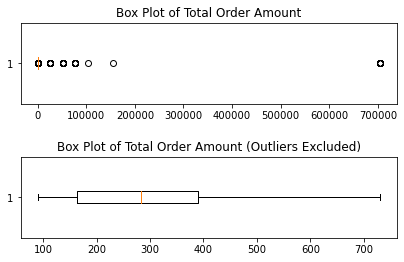

In [6]:
title = 'Box Plot of Total Order Amount'
fig1 = box_plots(orders.order_amount, title)

print(f'Tally of the different "total_items" values:\n{orders.total_items.value_counts()}\n\n')
print(f'Orders where the number of items is very large (2000):\n{orders[orders.total_items == 2000]}\n')

**Important:**

We see that the majority of orders are for more than one item and that the number of items varies, to get a fair evaluation
of the value of a pair of sneakers we should divide the order amount by the number of items.

If we're more interested in the total order amount than the cost per item, we should not divide by the number of items. We
should instead account for the effect of the orders with an atypically large number of items (2000) that will skew the average. We see that these are always the same order from the same shop (shop_id 42) for the same total order amount.

**Next** - Calculate the cost per item and investigate

Overview of data:
           order_id      shop_id      user_id   order_amount  total_items  \
count   5000.000000  5000.000000  5000.000000    5000.000000   5000.00000   
unique          NaN          NaN          NaN            NaN          NaN   
top             NaN          NaN          NaN            NaN          NaN   
freq            NaN          NaN          NaN            NaN          NaN   
mean    2500.500000    50.078800   849.092400    3145.128000      8.78720   
std     1443.520003    29.006118    87.798982   41282.539349    116.32032   
min        1.000000     1.000000   607.000000      90.000000      1.00000   
25%     1250.750000    24.000000   775.000000     163.000000      1.00000   
50%     2500.500000    50.000000   849.000000     284.000000      2.00000   
75%     3750.250000    75.000000   925.000000     390.000000      3.00000   
max     5000.000000   100.000000   999.000000  704000.000000   2000.00000   

       payment_method          created_at  cost_per_item 

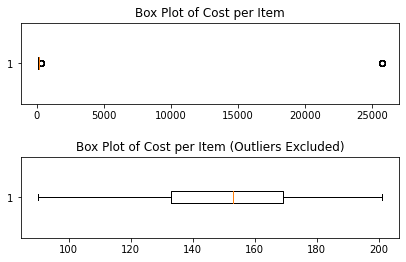

In [7]:
# investigating the cost per item
orders["cost_per_item"] = orders.order_amount / orders.total_items
print(f'Overview of data:\n{orders.describe(include="all")}\n')

title = 'Box Plot of Cost per Item'
fig2 = box_plots(orders.cost_per_item, title)

**Important** - We see that evaluating the cost per item has reduced the number of extreme values, however, there still remain some orders with a very high cost per item (25725). 

**Next** - Let's examine these cases

Orders where the cost per item is extreme (25725):
      order_id  shop_id  user_id  order_amount  total_items payment_method  \
160        161       78      990         25725            1    credit_card   
490        491       78      936         51450            2          debit   
493        494       78      983         51450            2           cash   
511        512       78      967         51450            2           cash   
617        618       78      760         51450            2           cash   
691        692       78      878        154350            6          debit   
1056      1057       78      800         25725            1          debit   
1193      1194       78      944         25725            1          debit   
1204      1205       78      970         25725            1    credit_card   
1259      1260       78      775         77175            3    credit_card   
1384      1385       78      867         25725            1           cash   
1419      142

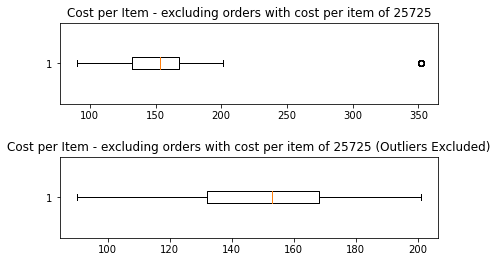

In [8]:
print(f'Orders where the cost per item is extreme (25725):\n{orders[orders.cost_per_item == 25725]}\n\
    \n\nNumber of orders with cost per item of 25725: {len(orders[orders.cost_per_item == 25725])}\n')

title = 'Cost per Item - excluding orders with cost per item of 25725'
fig3 = box_plots(orders[orders.cost_per_item != 25725].cost_per_item, title)

**Important:**

* We see that one shop (shop_id 78) is responsible for the remaining orders with an extereme cost per item of 25725. This suggests that this is in fact a special case. These may be bulk orders where the shop is selling many pairs of sneakers as a single item.
* When these orders are excluded there are no more extreme values to skew the average cost of a pair of sneakers.

In [9]:
central_tendency("Cost per item (all orders)", orders.cost_per_item)
central_tendency("Cost per item (excl. cost of 25725)", orders[orders.cost_per_item != 25725].cost_per_item)

Cost per item (all orders):
          Max = 25725.0
          Min = 90.0
          Ave = 387.7428
          Median = 153.0
          Mode = 0    153.0
dtype: float64

Cost per item (excl. cost of 25725):
          Max = 352.0
          Min = 90.0
          Ave = 152.47557529269278
          Median = 153.0
          Mode = 0    153.0
dtype: float64



**The average cost per item when exlcuding orders from shop 78 is 152.5, a reasonable value that is very similar to the median of 153.** 

**We can also see that the median of the cost per item for all orders was 153 showing that the median was effective for evaluating the central tendency even with outliers from shop 78 included in the data.**

**However** - If we are more interested in total order amount than the cost per item, we can examine the total order amount excluding the outliers where the number of items is very high (2000 items), or where bulk orders are suspected (cost per item is 25725).

In [10]:
# if we care more about total order amount
central_tendency("Total order cost for all shops", orders.order_amount)
central_tendency("Total order cost, exlcuding bulk orders", \
                 orders[(orders.total_items != 2000) & (orders.cost_per_item != 25725) ].order_amount)


Total order cost for all shops:
          Max = 704000
          Min = 90
          Ave = 3145.128
          Median = 284.0
          Mode = 0    153
dtype: int64

Total order cost, exlcuding bulk orders:
          Max = 1760
          Min = 90
          Ave = 302.58051448247926
          Median = 284.0
          Mode = 0    153
dtype: int64



In this case, it can be seen that the median provides a good indication of the central tendency regardless of whether the data from large and bulk orders are included. The median is 284, significantly higher than the median cost per item, which is expected since most orders were for multiple items.

## Question 1
## b) What metric would you report for this dataset?
The median cost per item would best represent the typical cost of a pair of sneakers sold in the 30 day window. I would report this metric since it accounts for the fact that different orders can include different numbers of items and it is unaffected by the outlier orders placed at shop 78. 

(The median of the order amount should be used if the total order value is of greater interest than cost per item.)

## Question 1
## c) What is its value?

The Median cost per item is: 153

In [11]:
central_tendency("Cost per item (all orders)", orders.cost_per_item)

Cost per item (all orders):
          Max = 25725.0
          Min = 90.0
          Ave = 387.7428
          Median = 153.0
          Mode = 0    153.0
dtype: float64



## Question 2
## a) How many orders were shipped by Speedy Express in total?

Total orders shipped by Speedy Express: 54  
#### SQL Query:
`SELECT COUNT(*) AS "# Orders By Speedy Express"  
FROM Orders  
WHERE ShipperID = (  
    SELECT ShipperID  
    FROM Shippers  
    WHERE ShipperName = "Speedy Express");`


## Question 2
## b) What is the last name of the employee with the most orders?
Last name of the employee with the most orders: Peacock  
#### SQL Query:
`SELECT LastName AS "Employee With Most Orders"
From Employees
WHERE EmployeeID = (
    SELECT EmployeeID
    FROM(
        SELECT EmployeeID, MAX(ordercount) 
        FROM (
            SELECT EmployeeID, COUNT(*) ordercount
            FROM Orders 
            GROUP BY EmployeeID
        )
    )
	LIMIT 1);`

## Question 2
## c) What product was ordered the most by customers in Germany?
Product ordered the most by customers in Germany: Boston Crab Meat  
#### SQL Query:
`SELECT ProductName AS "Germany's Most Wanted"
FROM Products
WHERE ProductID = (
    SELECT ProductID
    FROM(
        SELECT ProductID, MAX(SUM)
        FROM(
            SELECT ProductID, SUM(Quantity) SUM
            FROM(
                SELECT *
                FROM OrderDetails
                WHERE OrderID IN (
                    SELECT OrderID
                    FROM Orders
                    WHERE CustomerID IN (
                        SELECT CustomerID
                        FROM Customers
                        WHERE Country = "Germany"
                    )
                )
             )
        GROUP BY ProductID
        )
    )
LIMIT 1);`